In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp 
import seaborn as sns
import itertools
import scipy.stats as ssp
%matplotlib inline
import seaborn as sns

import scipy.stats as st
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# pd.set_option('display.max_columns', None)
# df = df[df['closing_price'].between(99, 101, inclusive=True)]

In [3]:
df=pd.read_csv('globalterrorismdb_0718dist.csv',encoding='ISO-8859-1')

C:\Users\48500\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df2=df[['iyear','imonth','iday','country_txt','region_txt','city','attacktype1_txt','targtype1_txt','weaptype1_txt','nkill','natlty1_txt']]

In [5]:
df3 = df2.dropna()

In [6]:
# ilości wystąpień atatków terrorystycznych w poszczególnych regionach
reg = df3['region_txt'].groupby(df3.region_txt).count()
print(reg)

region_txt
Australasia & Oceania            275
Central America & Caribbean     8003
Central Asia                     557
East Asia                        755
Eastern Europe                  4936
Middle East & North Africa     47948
North America                   3353
South America                  17246
South Asia                     43043
Southeast Asia                 11940
Sub-Saharan Africa             15823
Western Europe                 15543
Name: region_txt, dtype: int64


Text(0.5, 1.0, 'ilość ataków terrorystycznych w poszczególnych regionach')

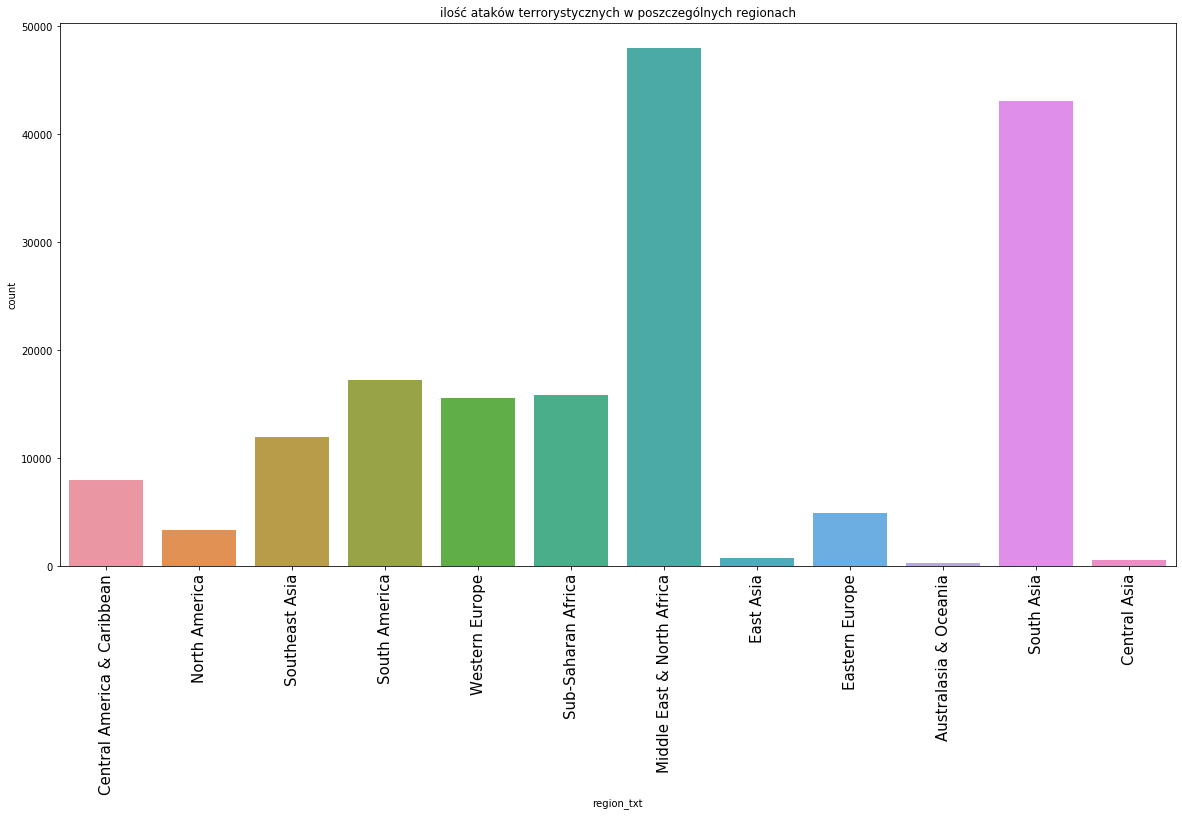

In [7]:
fig, ax = plt.subplots(figsize = (20,10))

sns.countplot(df3.region_txt, ax = ax)
plt.xticks(rotation = 90, size = 15)
plt.title('ilość ataków terrorystycznych w poszczególnych regionach')

In [8]:
# PRÓBA 1


# TWORZENIE DODATKOWEJ KOLUMNY 'attack_count'
# stworzenie osobnej DF
df4 = df3[['nkill']].groupby(df3.region_txt).count()
df4

,nkill
region_txt,
Australasia & Oceania,275
Central America & Caribbean,8003
Central Asia,557
East Asia,755
Eastern Europe,4936
Middle East & North Africa,47948
North America,3353
South America,17246
South Asia,43043


In [9]:
# REGIONY W KTÓRYCH LICZBA OFIAR JEST WIĘKSZA OD 100

dfof = df3[['region_txt']].where(df3.nkill > 100).groupby(df3.region_txt).count()
dfof 

,region_txt
region_txt,
Australasia & Oceania,0
Central America & Caribbean,18
Central Asia,0
East Asia,1
Eastern Europe,8
Middle East & North Africa,59
North America,5
South America,3
South Asia,26


In [10]:
# OFIARY Z REGIONU 'Middle East & North Africa' Z PODZIAŁEM NA MIASTA
of1 = df3[['region_txt']].where(df3.region_txt == 'Middle East & North Africa').groupby(df3.city).count()
of1
# jak wydostać miasta z wartościami > 0

,region_txt
city,
62 miles South of Dushanbe,0
A Coruna district,0
A'arbaniyeh,1
ANkara,1
Aab Kamra,0
...,...
vinchos,0
wakunai,0
yacan,0


In [11]:
vbron = df3.groupby(df3.weaptype1_txt)['region_txt'].count()
vbron

weaptype1_txt
Biological                                                                        34
Chemical                                                                         312
Explosives                                                                     87154
Fake Weapons                                                                      32
Firearms                                                                       54856
Incendiary                                                                     10422
Melee                                                                           3558
Other                                                                            112
Radiological                                                                      14
Sabotage Equipment                                                               139
Unknown                                                                        12653
Vehicle (not to include vehicle-borne explosives, i

In [12]:
vvbron = df3[['region_txt']].groupby(df3.nkill).count()
vvbron

,region_txt
nkill,
0.0,87046
1.0,36216
2.0,13956
3.0,7628
4.0,4907
...,...
953.0,1
1180.0,1
1383.0,1


In [43]:
# REGIONY W KTÓRYCH LICZBA OFIAR JESTW IĘKSZA OD 500
of2 = df3[['region_txt']].where(df3.nkill > 500).groupby(df3.region_txt).count()
of2

,region_txt
region_txt,
Australasia & Oceania,0
Central America & Caribbean,0
Central Asia,0
East Asia,0
Eastern Europe,0
Middle East & North Africa,4
North America,2
South America,0
South Asia,1


In [47]:
# REGIONY W KTÓRYCH LICZBA OFIAR JEST wIĘKSZA OD 1000
of3 = df3[['region_txt']].where(df3.nkill > 1000).groupby(df3.region_txt).count()
of3

,region_txt
region_txt,
Australasia & Oceania,0
Central America & Caribbean,0
Central Asia,0
East Asia,0
Eastern Europe,0
Middle East & North Africa,1
North America,2
South America,0
South Asia,0


In [13]:


# ILOŚC OFIAR Z PODZIAŁEM NA RODZAJ ATAKU

weap = df3[['nkill']].groupby(df3.attacktype1_txt).count()
weap

,nkill
attacktype1_txt,
Armed Assault,40000
Assassination,19119
Bombing/Explosion,83065
Facility/Infrastructure Attack,9718
Hijacking,602
Hostage Taking (Barricade Incident),896
Hostage Taking (Kidnapping),8548
Unarmed Assault,993
Unknown,6481


In [14]:
sum_nkill = df3[['nkill']].groupby(df3.region_txt).count()
sum_nkill

,nkill
region_txt,
Australasia & Oceania,275
Central America & Caribbean,8003
Central Asia,557
East Asia,755
Eastern Europe,4936
Middle East & North Africa,47948
North America,3353
South America,17246
South Asia,43043


In [15]:
region = df3[['region_txt']].drop_duplicates()
region

,region_txt
0,Central America & Caribbean
1,North America
2,Southeast Asia
6,South America
12,Western Europe
16,Sub-Saharan Africa
133,Middle East & North Africa
162,East Asia
258,Eastern Europe
565,Australasia & Oceania


In [16]:
region = pd.DataFrame({
    'region': ['Australasia & Oceania', 'Central America & Caribbean', 'Central Asia', 'East Asia', 'Eastern Europe', 'Middle East & North Africa', 'North America', 'South America', 'South Asia', 'Southeast Asia', 'Sub-Saharan Africa', 'Western Europe'
]})

In [17]:
# ILOŚC OFIAR Z PODZIAŁEM NA RODZAJ ATAKU  W POSZCZEGÓLNYCH REGIONACH
# arm, ass, bom, fac, hij, barr, kid, una, unk

arm = df3[['nkill']].where(df3.attacktype1_txt == 'Armed Assault').groupby(df3.region_txt).count()
ass = df3[['nkill']].where(df3.attacktype1_txt == 'Assassination').groupby(df3.region_txt).count()
bom = df3[['nkill']].where(df3.attacktype1_txt == 'Bombing/Explosion').groupby(df3.region_txt).count()
fac = df3[['nkill']].where(df3.attacktype1_txt == 'Facility/Infrastructure Attack').groupby(df3.region_txt).count()
hij = df3[['nkill']].where(df3.attacktype1_txt == 'Hijacking').groupby(df3.region_txt).count()
barr = df3[['nkill']].where(df3.attacktype1_txt == 'Hostage Taking (Barricade Incident)').groupby(df3.region_txt).count()
kid = df3[['nkill']].where(df3.attacktype1_txt == 'Hostage Taking (Kidnapping)').groupby(df3.region_txt).count()
una = df3[['nkill']].where(df3.attacktype1_txt == 'Unarmed Assault').groupby(df3.region_txt).count()
unk = df3[['nkill']].where(df3.attacktype1_txt == 'Unknown').groupby(df3.region_txt).count()

In [18]:

r = pd.merge(arm,ass, how = 'left', left_on = ['region_txt'], right_on = ['region_txt'])
r1 = pd.merge(r,bom, how = 'left', left_on = ['region_txt'], right_on = ['region_txt'])
r2 = pd.merge(r1,fac, how = 'left', left_on = ['region_txt'], right_on = ['region_txt'])
r3 = pd.merge(r2,hij, how = 'left', left_on = ['region_txt'], right_on = ['region_txt'])
r4 = pd.merge(r3,barr, how = 'left', left_on = ['region_txt'], right_on = ['region_txt'])
r5 = pd.merge(r4,kid, how = 'left', left_on = ['region_txt'], right_on = ['region_txt'])
r6 = pd.merge(r5,una, how = 'left', left_on = ['region_txt'], right_on = ['region_txt'])
r7 = pd.merge(r6,unk, how = 'left', left_on = ['region_txt'], right_on = ['region_txt'])
df_ofiary = pd.merge(r7,sum_nkill, how = 'left', left_on = ['region_txt'], right_on = ['region_txt'])


In [19]:
# zmiana nazw kolumn
df_ofiary.columns = ['Armed_Assault', 'Assassination', 'Bombing_Explosion', 'Facility_Infrastructure_Attack', 'Hijacking', 'Hostage_Taking(Barricade_Incident)', 'Hostage_Taking(Kidnapping)', 'Unarmed_Assault', 'Unknown', 'razem']

# ILOŚĆ OFIAR WG RODZAJU ATAKU Z PODZIAŁEM NA REGIONY
df_ofiary

,Armed_Assault,Assassination,Bombing_Explosion,Facility_Infrastructure_Attack,Hijacking,Hostage_Taking(Barricade_Incident),Hostage_Taking(Kidnapping),Unarmed_Assault,Unknown,razem
region_txt,,,,,,,,,,
Australasia & Oceania,49,36,70,71,3,6,13,11,16,275
Central America & Caribbean,3218,1239,2507,261,24,142,306,17,289,8003
Central Asia,115,115,234,19,8,2,44,5,15,557
East Asia,113,55,307,187,17,3,12,41,20,755
Eastern Europe,1223,398,2678,246,25,19,181,61,105,4936
Middle East & North Africa,9002,4167,29862,1064,125,98,1787,168,1675,47948
North America,442,254,1470,894,18,66,109,72,28,3353
South America,3596,2713,8024,716,64,210,1216,47,660,17246
South Asia,11235,4252,20289,2158,85,112,2692,319,1901,43043


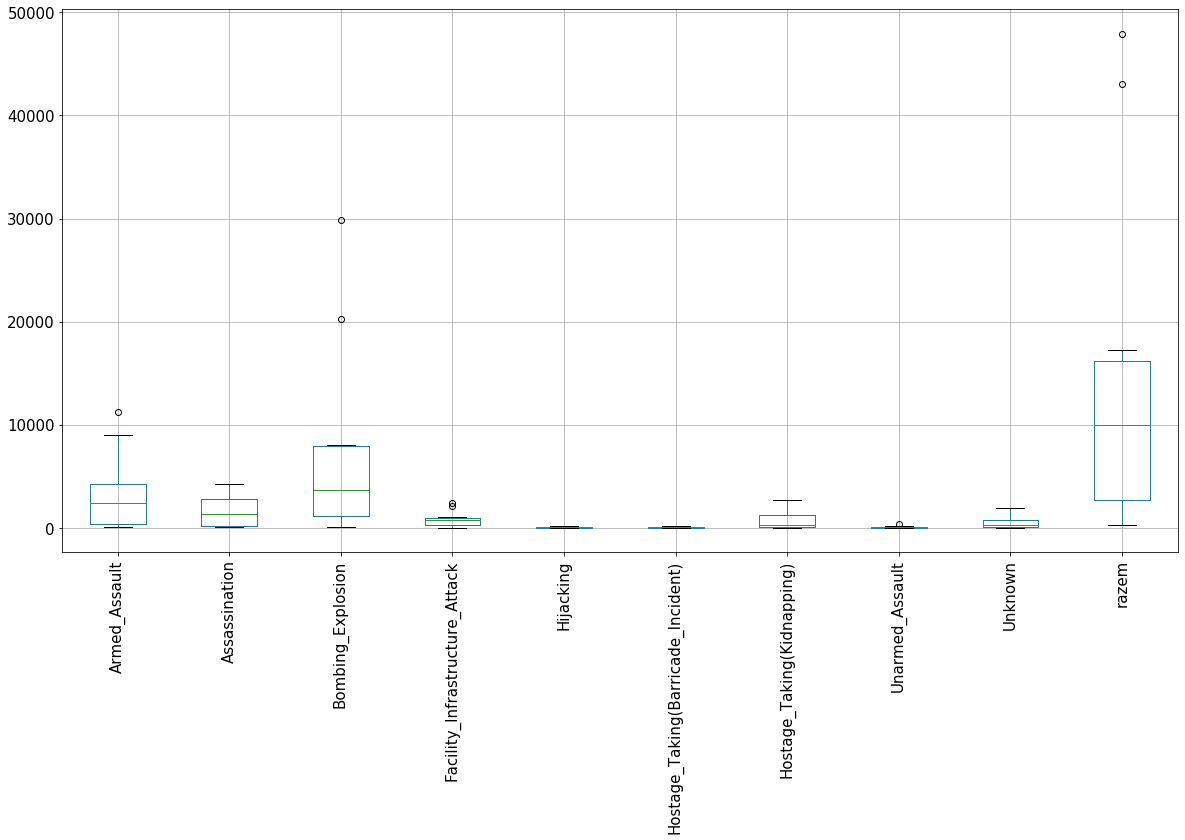

In [20]:
# WYKRES BOXPLOT ILOŚCI OFIAR WG TYPU ATAKU Z PODZIAŁEM NA REGION

plot = df_ofiary.boxplot(rot = 90, figsize = (20,10), fontsize = 15)

No handles with labels found to put in legend.


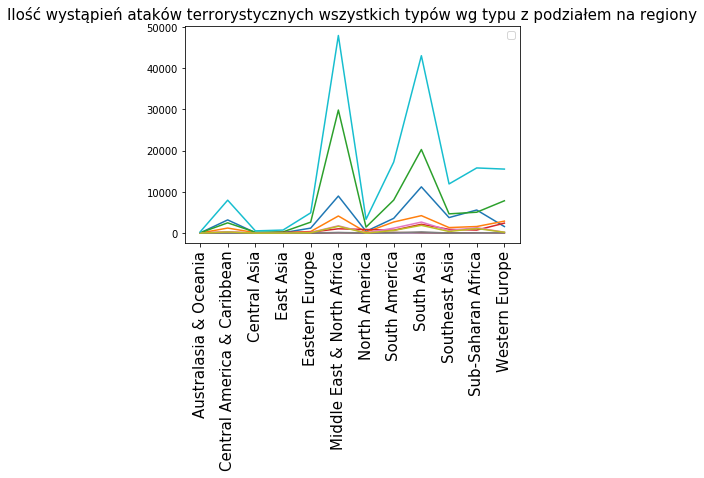

In [21]:
plt.title("Ilość wystąpień ataków terrorystycznych wszystkich typów wg typu z podziałem na regiony", size = 15)
plt.xticks(rotation = 90, size = 15)
plt.legend()                      # DOPISAC LEGENDĘ!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!1

plt.plot(df_ofiary)


# jak powiększyć wykres?

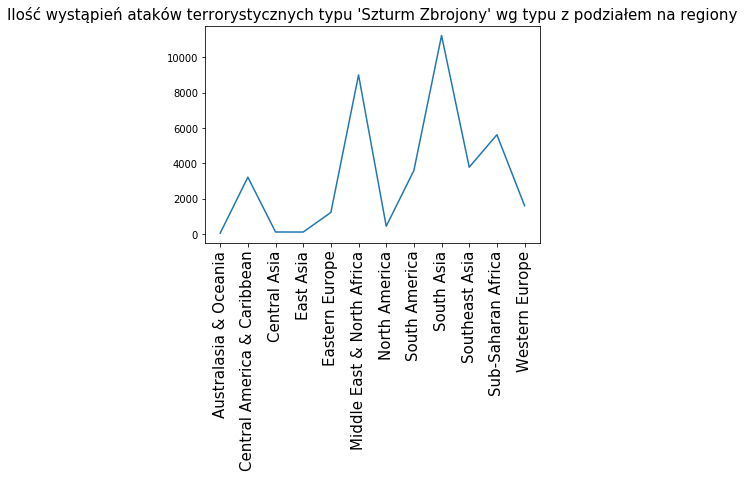

In [22]:
plt.title("Ilość wystąpień ataków terrorystycznych typu 'Szturm Zbrojony' wg typu z podziałem na regiony", size = 15)
plt.xticks(rotation = 90, size = 15)
plt.plot(arm)

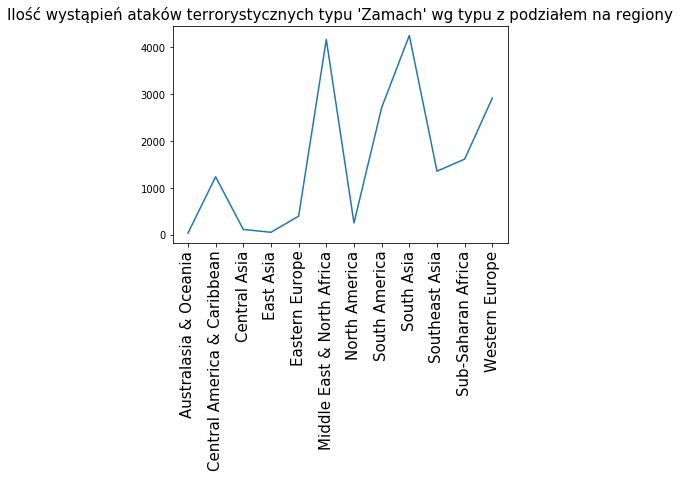

In [23]:
plt.title("Ilość wystąpień ataków terrorystycznych typu 'Zamach' wg typu z podziałem na regiony", size = 15)
plt.xticks(rotation = 90, size = 15)
plt.plot(ass)

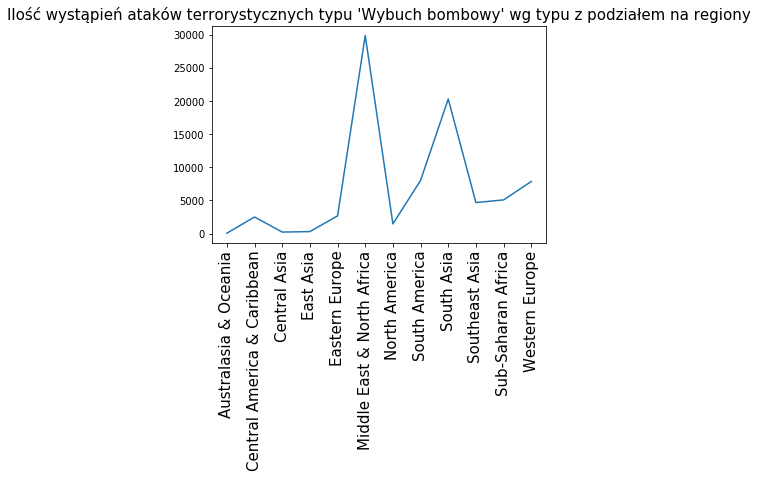

In [24]:
plt.title("Ilość wystąpień ataków terrorystycznych typu 'Wybuch bombowy' wg typu z podziałem na regiony", size = 15)
plt.xticks(rotation = 90, size = 15)
plt.plot(bom)

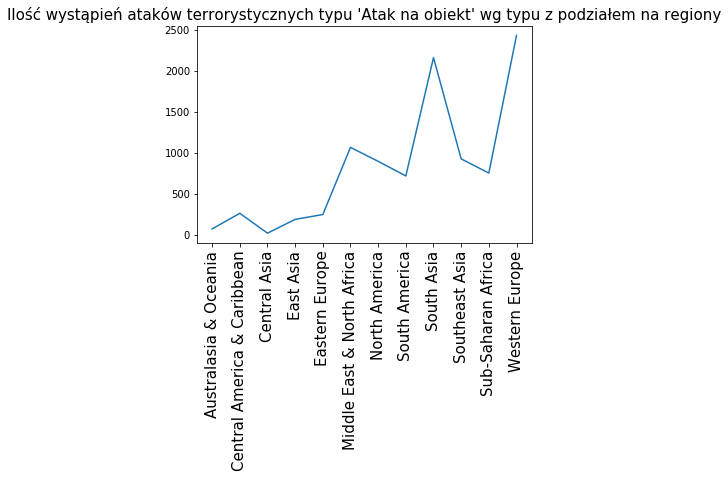

In [25]:
plt.title("Ilość wystąpień ataków terrorystycznych typu 'Atak na obiekt' wg typu z podziałem na regiony", size = 15)
plt.xticks(rotation = 90, size = 15)
plt.plot(fac)

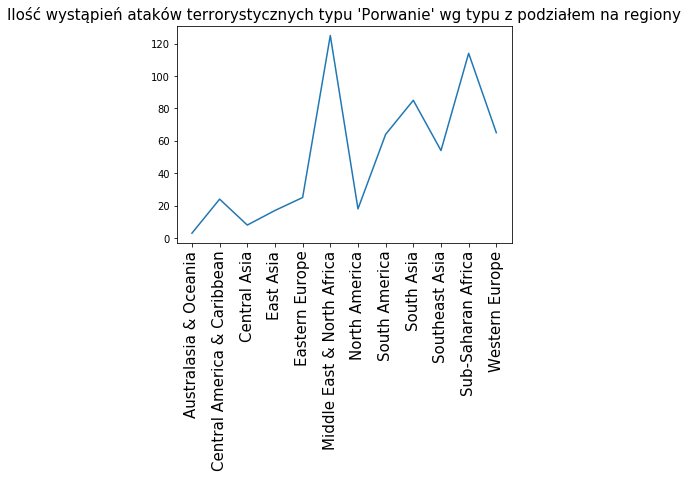

In [26]:
plt.title("Ilość wystąpień ataków terrorystycznych typu 'Porwanie' wg typu z podziałem na regiony", size = 15)
plt.xticks(rotation = 90, size = 15)
plt.plot(hij)

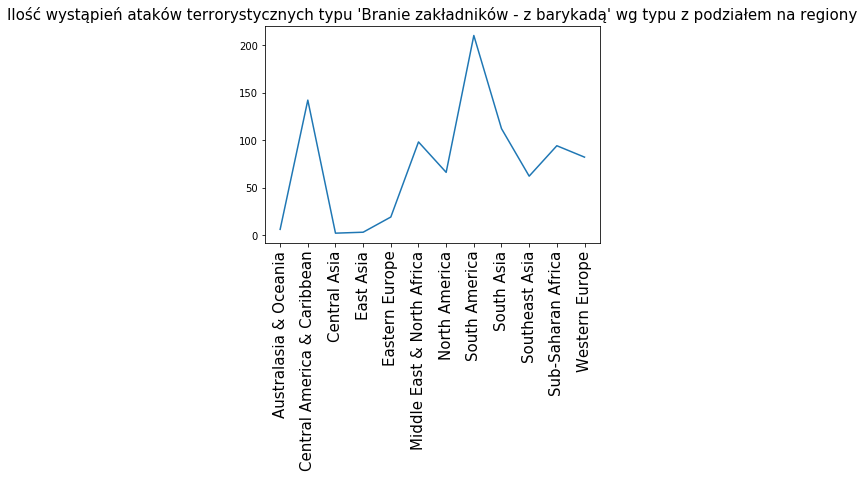

In [27]:
plt.title("Ilość wystąpień ataków terrorystycznych typu 'Branie zakładników - z barykadą' wg typu z podziałem na regiony", size = 15)
plt.xticks(rotation = 90, size = 15)
plt.plot(barr)

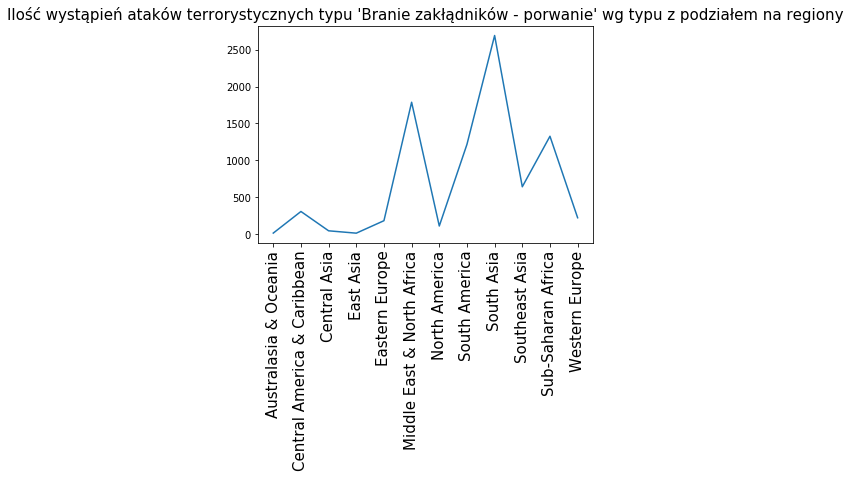

In [28]:
plt.title("Ilość wystąpień ataków terrorystycznych typu 'Branie zakłądników - porwanie' wg typu z podziałem na regiony", size = 15)
plt.xticks(rotation = 90, size = 15)
plt.plot(kid)

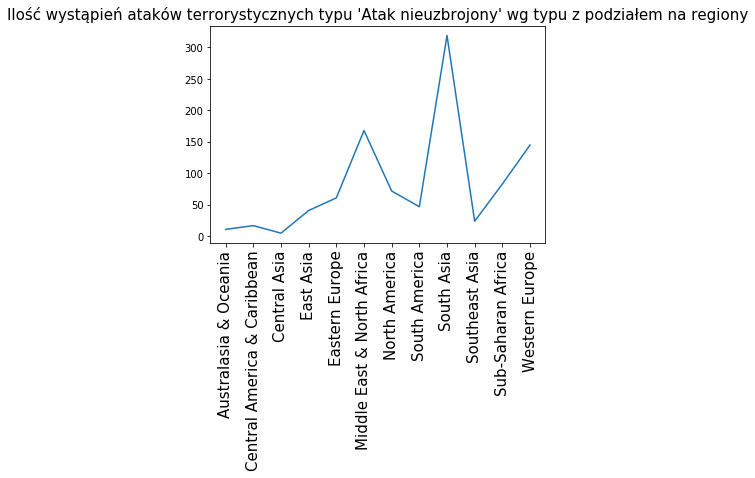

In [29]:
plt.title("Ilość wystąpień ataków terrorystycznych typu 'Atak nieuzbrojony' wg typu z podziałem na regiony", size = 15)
plt.xticks(rotation = 90, size = 15)
plt.plot(una)

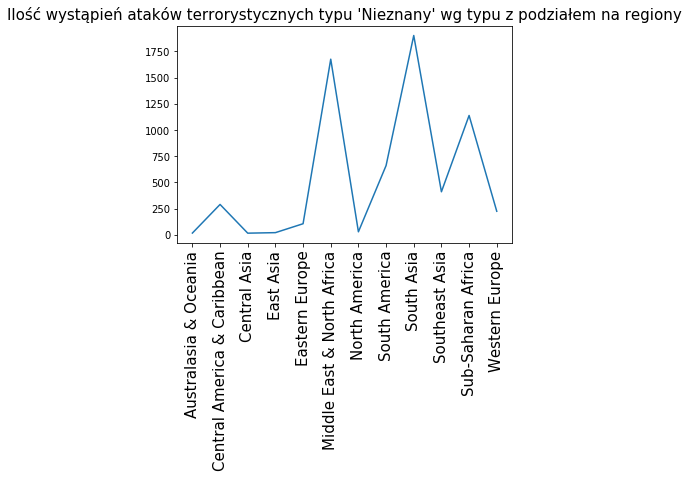

In [30]:
plt.title("Ilość wystąpień ataków terrorystycznych typu 'Nieznany' wg typu z podziałem na regiony", size = 15)
plt.xticks(rotation = 90, size = 15)
plt.plot(unk)

In [31]:
df_ofiary.describe()

,Armed_Assault,Assassination,Bombing_Explosion,Facility_Infrastructure_Attack,Hijacking,Hostage_Taking(Barricade_Incident),Hostage_Taking(Kidnapping),Unarmed_Assault,Unknown,razem
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,3333.333333,1593.250000,6922.083333,809.833333,50.166667,74.666667,712.333333,82.750000,540.083333,14118.500000
std,3660.531490,1568.997371,9135.669458,780.914712,41.307788,63.015631,862.785587,90.219052,671.787095,15932.462439
min,49.000000,36.000000,70.000000,19.000000,3.000000,2.000000,12.000000,5.000000,15.000000,275.000000
25%,360.250000,219.250000,1179.250000,231.250000,17.750000,15.750000,92.750000,22.250000,26.000000,2703.500000
50%,2411.500000,1298.500000,3681.000000,733.500000,39.500000,74.000000,263.500000,54.000000,256.500000,9971.500000
75%,4242.000000,2764.000000,7898.750000,959.000000,70.000000,101.500000,1243.500000,98.500000,779.500000,16178.750000
max,11235.000000,4252.000000,29862.000000,2427.000000,125.000000,210.000000,2692.000000,319.000000,1901.000000,47948.000000


In [32]:
df_ofiary

,Armed_Assault,Assassination,Bombing_Explosion,Facility_Infrastructure_Attack,Hijacking,Hostage_Taking(Barricade_Incident),Hostage_Taking(Kidnapping),Unarmed_Assault,Unknown,razem
region_txt,,,,,,,,,,
Australasia & Oceania,49,36,70,71,3,6,13,11,16,275
Central America & Caribbean,3218,1239,2507,261,24,142,306,17,289,8003
Central Asia,115,115,234,19,8,2,44,5,15,557
East Asia,113,55,307,187,17,3,12,41,20,755
Eastern Europe,1223,398,2678,246,25,19,181,61,105,4936
Middle East & North Africa,9002,4167,29862,1064,125,98,1787,168,1675,47948
North America,442,254,1470,894,18,66,109,72,28,3353
South America,3596,2713,8024,716,64,210,1216,47,660,17246
South Asia,11235,4252,20289,2158,85,112,2692,319,1901,43043


In [33]:
# CZY ATAK BOMBOWY BARDZIEJ SKUTECZNY (czyli czy więcej osób zginęło) NIŻ POZOSTAŁE ATAKI?



In [34]:
desc = df_ofiary.describe()
desc

,Armed_Assault,Assassination,Bombing_Explosion,Facility_Infrastructure_Attack,Hijacking,Hostage_Taking(Barricade_Incident),Hostage_Taking(Kidnapping),Unarmed_Assault,Unknown,razem
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,3333.333333,1593.250000,6922.083333,809.833333,50.166667,74.666667,712.333333,82.750000,540.083333,14118.500000
std,3660.531490,1568.997371,9135.669458,780.914712,41.307788,63.015631,862.785587,90.219052,671.787095,15932.462439
min,49.000000,36.000000,70.000000,19.000000,3.000000,2.000000,12.000000,5.000000,15.000000,275.000000
25%,360.250000,219.250000,1179.250000,231.250000,17.750000,15.750000,92.750000,22.250000,26.000000,2703.500000
50%,2411.500000,1298.500000,3681.000000,733.500000,39.500000,74.000000,263.500000,54.000000,256.500000,9971.500000
75%,4242.000000,2764.000000,7898.750000,959.000000,70.000000,101.500000,1243.500000,98.500000,779.500000,16178.750000
max,11235.000000,4252.000000,29862.000000,2427.000000,125.000000,210.000000,2692.000000,319.000000,1901.000000,47948.000000


In [35]:

# wartości dla zmiennej 'Bombing_Explosion'
nx = len(df_ofiary.Bombing_Explosion)
mx = desc.iloc[1, 2]
sx = desc.iloc[2, 2]

In [37]:
# wartości  dla zmiennych pozostałych
ny = len(df_ofiary)
my = desc.iloc[1, 9] - mx
sy = desc.iloc[2, 9] - sx

In [38]:
print(ny, my, sy)

12 7196.416666666667 6796.79298073356


In [39]:
a = 0.05                                     # poziom istotności
u = (mx-my)/np.sqrt(sx**2/nx + sy**2/ny)     # obliczenia statystyki testowej

In [40]:
rozkladNormalny = st.norm()                  # utworzenie instancji rozkładu normalnego
pvalue = rozkladNormalny.cdf(u)

In [41]:
print(rozkladNormalny)
print(pvalue)
print(a)

0.4667434189600285
0.05


In [42]:
# WNIOSKI
# P - value jest większe od założonego poziomu istotności, więc należy uznać hipozę zerową za prawdziwą. Ataki bombowe sa bardziej skutecznymi atakami od pozostałych.